In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import statsmodels as sm
import plotnine as p9
import seaborn as sns
df = pd.read_csv('churn_clean.csv',dtype={'locationid':np.int64})
df.head(5)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [2]:
df = df.drop(columns=['City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Email', 'Job', 'Marital', 'Contacts', 'Techie', 'Contract', 'Phone', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'PaperlessBilling', 'PaymentMethod', 'StreamingTV', 'StreamingMovies', 'Port_modem', 'Tablet', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'Bandwidth_GB_Year', 'MonthlyCharge'])

In [3]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'Children', 'Age',
       'Income', 'Gender', 'Churn', 'Outage_sec_perweek',
       'Yearly_equip_failure', 'InternetService', 'Multiple', 'Tenure'],
      dtype='object')

In [4]:
df.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
Children                0
Age                     0
Income                  0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Yearly_equip_failure    0
InternetService         0
Multiple                0
Tenure                  0
dtype: int64

In [5]:
df.describe()

,CaseOrder,Children,Age,Income,Outage_sec_perweek,Yearly_equip_failure,Tenure
count,10000.00000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.0877,53.078400,39806.926771,10.001848,0.398000,34.526188
std,2886.89568,2.1472,20.698882,28199.916702,2.976019,0.635953,26.443063
min,1.00000,0.0000,18.000000,348.670000,0.099747,0.000000,1.000259
25%,2500.75000,0.0000,35.000000,19224.717500,8.018214,0.000000,7.917694
50%,5000.50000,1.0000,53.000000,33170.605000,10.018560,0.000000,35.430507
75%,7500.25000,3.0000,71.000000,53246.170000,11.969485,1.000000,61.479795
max,10000.00000,10.0000,89.000000,258900.700000,21.207230,6.000000,71.999280


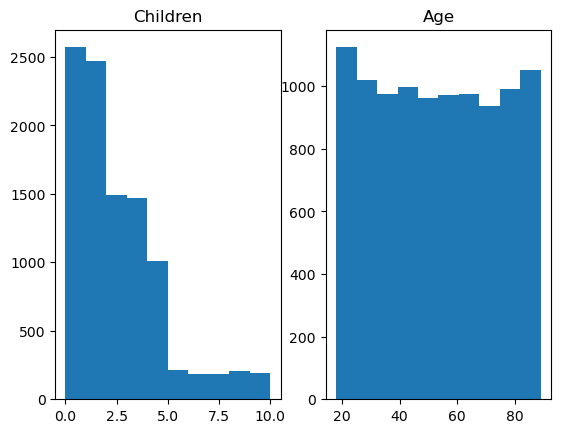

In [6]:
figure, axis = plt.subplots(1,2)
axis[0].hist(df['Children'])
axis[0].set_title("Children")
axis[1].hist(df['Age'])
axis[1].set_title('Age')
plt.show()

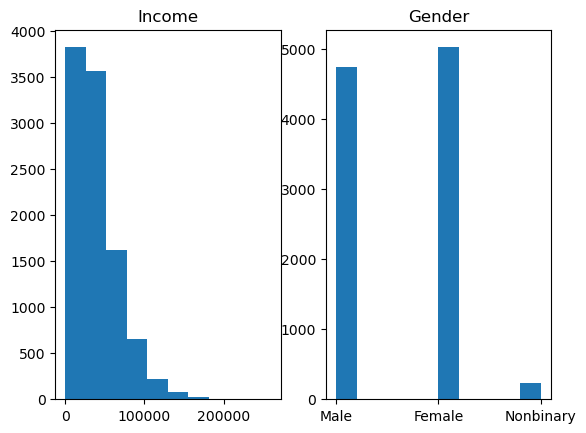

In [7]:
figure, axis = plt.subplots(1,2)
axis[0].hist(df['Income'])
axis[0].set_title("Income")
axis[1].hist(df['Gender'])
axis[1].set_title('Gender')
plt.show()

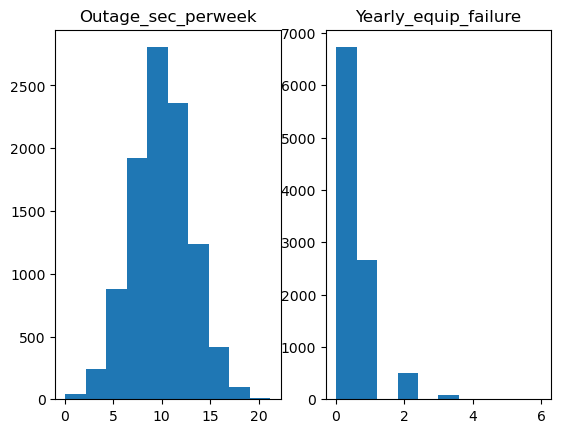

In [8]:
figure, axis = plt.subplots(1,2)
axis[0].hist(df['Outage_sec_perweek'])
axis[0].set_title("Outage_sec_perweek")
axis[1].hist(df['Yearly_equip_failure'])
axis[1].set_title('Yearly_equip_failure')
plt.show()

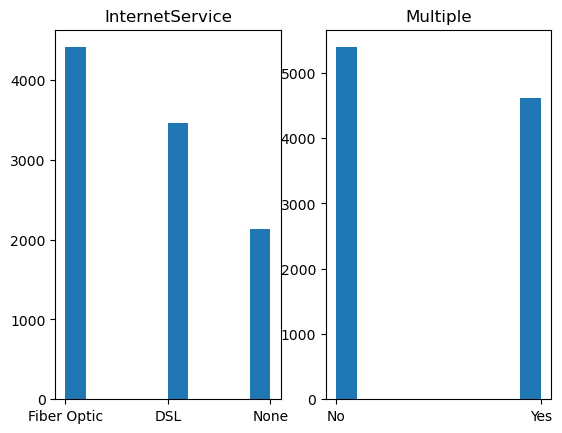

In [9]:
figure, axis = plt.subplots(1,2)
axis[0].hist(df['InternetService'])
axis[0].set_title("InternetService")
axis[1].hist(df['Multiple'])
axis[1].set_title('Multiple')
plt.show()

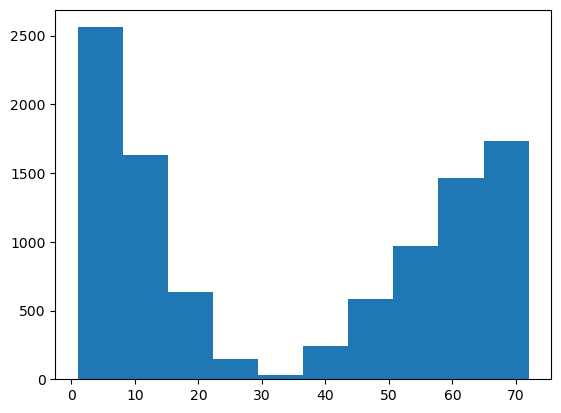

In [10]:
plt.hist(df.Tenure)
plt.show()

<AxesSubplot:xlabel='Children', ylabel='Churn'>

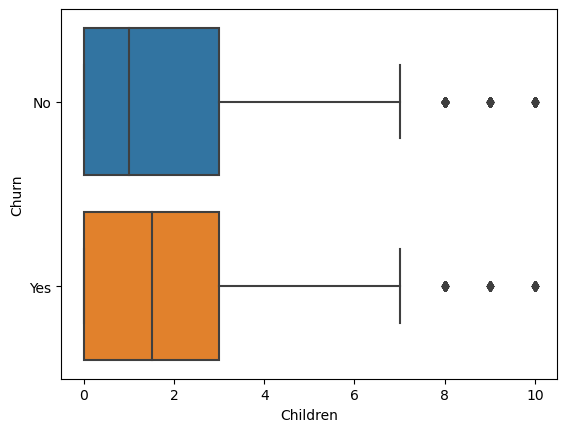

In [11]:
sns.boxplot(x = df.Children, y = df.Churn)

<AxesSubplot:xlabel='Income', ylabel='Churn'>

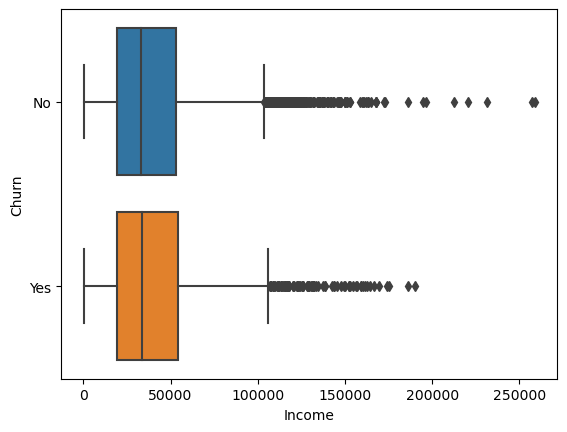

In [12]:
sns.boxplot(x = df.Income, y = df.Churn)

<AxesSubplot:xlabel='Age', ylabel='Churn'>

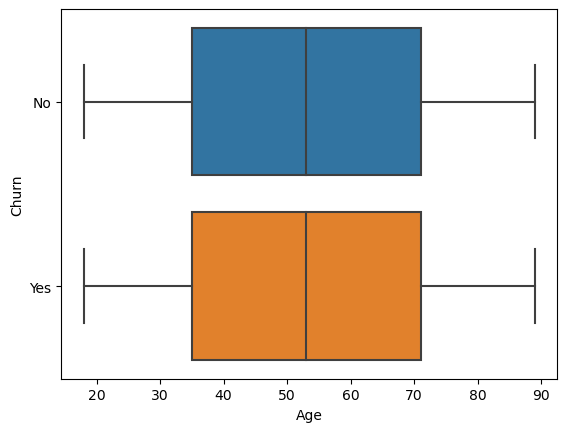

In [13]:
sns.boxplot(x = df.Age, y = df.Churn)

<AxesSubplot:xlabel='Outage_sec_perweek', ylabel='Churn'>

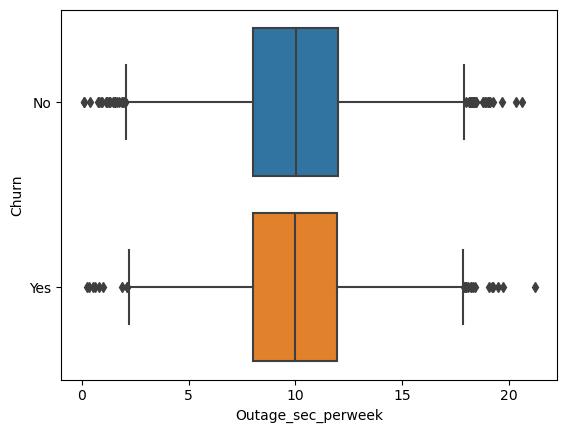

In [14]:
sns.boxplot(x=df.Outage_sec_perweek, y = df.Churn)

<AxesSubplot:xlabel='Yearly_equip_failure', ylabel='Churn'>

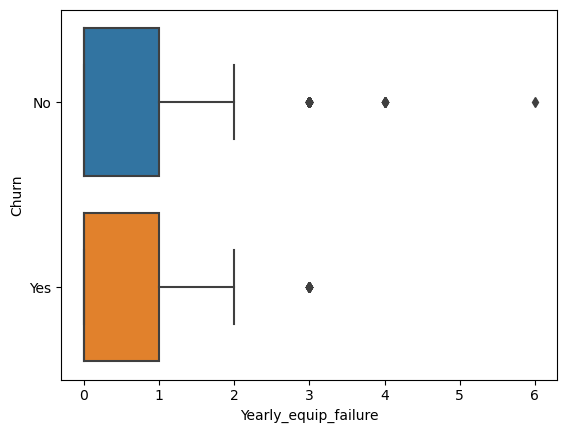

In [15]:
sns.boxplot(x=df.Yearly_equip_failure, y = df.Churn)

<AxesSubplot:xlabel='Tenure', ylabel='Churn'>

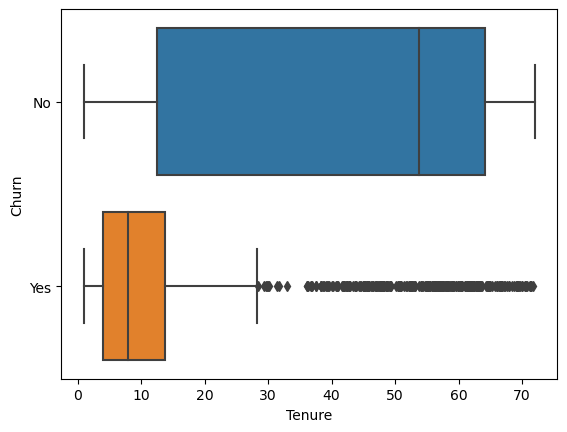

In [16]:
sns.boxplot(x=df.Tenure, y = df.Churn)

<AxesSubplot:xlabel='Gender'>

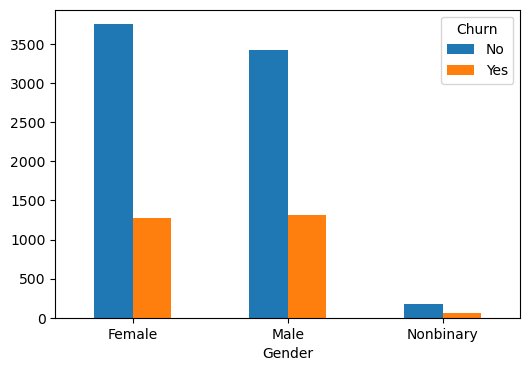

In [17]:
table = pd.crosstab(df.Gender, df.Churn)
table.plot.bar(figsize=(6,4), rot = 0)

<AxesSubplot:xlabel='InternetService'>

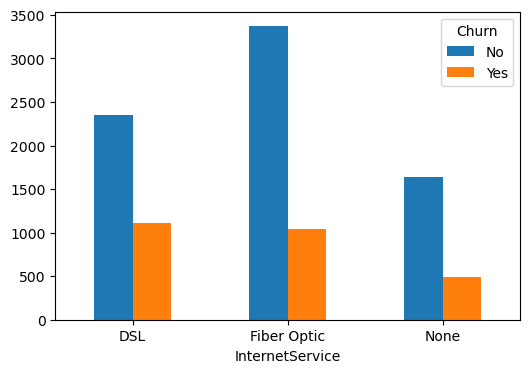

In [18]:
table = pd.crosstab(df.InternetService, df.Churn)
table.plot.bar(figsize=(6,4), rot = 0)

<AxesSubplot:xlabel='Multiple'>

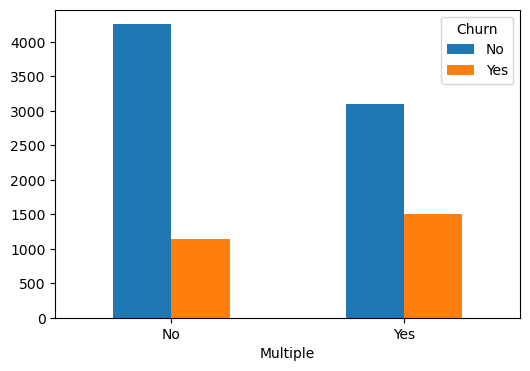

In [19]:
table = pd.crosstab(df.Multiple, df.Churn)
table.plot.bar(figsize=(6,4), rot = 0)

In [20]:
df = pd.get_dummies(df, columns = ['Gender', 'Churn', 'InternetService', 'Multiple'], drop_first = True)
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'Children', 'Age',
       'Income', 'Outage_sec_perweek', 'Yearly_equip_failure', 'Tenure',
       'Gender_Male', 'Gender_Nonbinary', 'Churn_Yes',
       'InternetService_Fiber Optic', 'InternetService_None', 'Multiple_Yes'],
      dtype='object')

In [21]:
df.columns = df.columns.str.replace(" ","")
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'Children', 'Age',
       'Income', 'Outage_sec_perweek', 'Yearly_equip_failure', 'Tenure',
       'Gender_Male', 'Gender_Nonbinary', 'Churn_Yes',
       'InternetService_FiberOptic', 'InternetService_None', 'Multiple_Yes'],
      dtype='object')

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[[ 'Children', 'Age', 'Income', 'Gender_Male', 'Gender_Nonbinary', 'InternetService_FiberOptic', 'InternetService_None','Outage_sec_perweek', 'Yearly_equip_failure', 'Multiple_Yes', 'Tenure']]

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns

vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]

print(vif_data)


                       feature       VIF
0                     Children  1.872897
1                          Age  5.750720
2                       Income  2.758720
3                  Gender_Male  1.876540
4             Gender_Nonbinary  1.042895
5   InternetService_FiberOptic  2.139130
6         InternetService_None  1.552295
7           Outage_sec_perweek  7.347847
8         Yearly_equip_failure  1.377543
9                 Multiple_Yes  1.797465
10                      Tenure  2.546604


In [23]:
from statsmodels.formula.api import logit
df_model = logit('Churn_Yes ~ Children + Age + Income + Gender_Male + Gender_Nonbinary + Outage_sec_perweek + Yearly_equip_failure + InternetService_FiberOptic + InternetService_None + Multiple_Yes + Tenure', data = df).fit()
print(df_model.summary())


Optimization terminated successfully.
         Current function value: 0.426047
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Thu, 16 Mar 2023   Pseudo R-squ.:                  0.2632
Time:                        19:29:44   Log-Likelihood:                -4260.5
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.2796      0.138      2.023      0.043      

In [24]:
from sklearn.linear_model import LinearRegression
print(df_model.aic)

8544.935699902304


In [25]:
df_model = logit('Churn_Yes ~ Age + Income + Gender_Male + Gender_Nonbinary + Outage_sec_perweek + Yearly_equip_failure + InternetService_FiberOptic + InternetService_None + Multiple_Yes + Tenure', data = df).fit()
print(df_model.summary())

Optimization terminated successfully.
         Current function value: 0.426053
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Thu, 16 Mar 2023   Pseudo R-squ.:                  0.2632
Time:                        19:29:45   Log-Likelihood:                -4260.5
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.2707      0.136      1.995      0.046      

In [26]:
df_model = logit('Churn_Yes ~ Income + Gender_Male + Gender_Nonbinary + Outage_sec_perweek + Yearly_equip_failure + InternetService_FiberOptic + InternetService_None + Multiple_Yes + Tenure', data = df).fit()
print(df_model.summary())

Optimization terminated successfully.
         Current function value: 0.426204
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Thu, 16 Mar 2023   Pseudo R-squ.:                  0.2629
Time:                        19:29:45   Log-Likelihood:                -4262.0
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.3907      0.117      3.343      0.001      

In [27]:
df_model = logit('Churn_Yes ~ Gender_Male + Gender_Nonbinary + Outage_sec_perweek + Yearly_equip_failure + InternetService_FiberOptic + InternetService_None + Multiple_Yes + Tenure', data = df).fit()
print(df_model.summary())

Optimization terminated successfully.
         Current function value: 0.426226
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Thu, 16 Mar 2023   Pseudo R-squ.:                  0.2629
Time:                        19:29:45   Log-Likelihood:                -4262.3
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.4178      0.110      3.814      0.000      

In [28]:
df_model = logit('Churn_Yes ~ Gender_Male + Outage_sec_perweek + Yearly_equip_failure + InternetService_FiberOptic + InternetService_None + Multiple_Yes + Tenure', data = df).fit()
print(df_model.summary())

Optimization terminated successfully.
         Current function value: 0.426249
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Thu, 16 Mar 2023   Pseudo R-squ.:                  0.2628
Time:                        19:29:45   Log-Likelihood:                -4262.5
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.4123      0.109      3.774      0.000      

In [29]:
df_model = logit('Churn_Yes ~ Gender_Male + Yearly_equip_failure + InternetService_FiberOptic + InternetService_None + Multiple_Yes + Tenure', data = df).fit()
print(df_model.summary())

Optimization terminated successfully.
         Current function value: 0.426249
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9993
Method:                           MLE   Df Model:                            6
Date:                Thu, 16 Mar 2023   Pseudo R-squ.:                  0.2628
Time:                        19:29:45   Log-Likelihood:                -4262.5
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.4239      0.065      6.536      0.000      

In [30]:
reduced_model = logit('Churn_Yes ~ Gender_Male + InternetService_FiberOptic + InternetService_None + Multiple_Yes + Tenure', data = df).fit()
print(reduced_model.summary())

Optimization terminated successfully.
         Current function value: 0.426313
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9994
Method:                           MLE   Df Model:                            5
Date:                Thu, 16 Mar 2023   Pseudo R-squ.:                  0.2627
Time:                        19:29:45   Log-Likelihood:                -4263.1
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.4053      0.063      6.466      0.000      

In [31]:
print(reduced_model.aic)

8538.252265007564


[[6453.  897.]
 [1330. 1320.]]


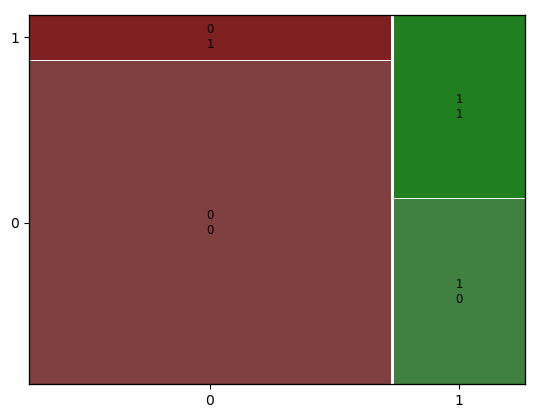

In [32]:
from statsmodels.graphics.mosaicplot import mosaic
conf_matrix = reduced_model.pred_table()
print(conf_matrix)
mosaic(conf_matrix)
plt.show()

In [33]:
df.to_csv(r'C:\Users\jorda\OneDrive\Documents\WGU Stuff\D208\JTompkins_D208PA2.csv')